In [2]:
#Rodrigo Barrera
#Diagrama en 3 dimensiones
import matplotlib.pyplot as plt
import numpy as np


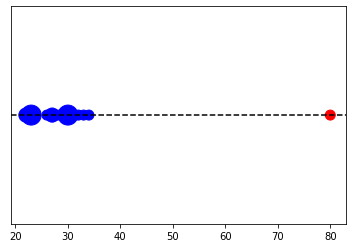

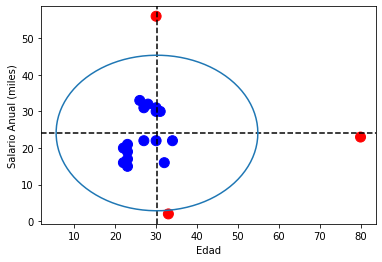

C:\Users\rodri\AppData\Local\Temp\ipykernel_28928\2271151945.py:48: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


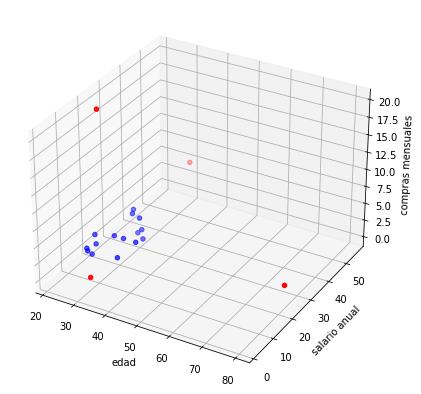

In [4]:
#Los datos son ingresados manualmente
#Se marcan con color rojo aquellos que son datos at{}


edades = np.array([22,22,23,23,23,23,26,27,27,28,30,30,30,30,31,32,33,34,80])
edad_unique, counts = np.unique(edades, return_counts=True)
 
sizes = counts*100
colors = ['blue']*len(edad_unique)
colors[-1] = 'red'
 
plt.axhline(1, color='k', linestyle='--')
plt.scatter(edad_unique, np.ones(len(edad_unique)), s=sizes, color=colors)
plt.yticks([])
plt.show()
from math import pi
 
salario_anual_miles = np.array([16,20,15,21,19,17,33,22,31,32,56,30,22,31,30,16,2,22,23])
media = (salario_anual_miles).mean()
std_x = (salario_anual_miles).std()*2
media_y = (edades).mean()
std_y = (edades).std()*2
 
colors = ['blue']*len(salario_anual_miles)
for index, x in enumerate(salario_anual_miles):
    if abs(x-media) > std_x:
        colors[index] = 'red'
        
for index, x in enumerate(edades):
    if abs(x-media_y) > std_y:
        colors[index] = 'red'
 
plt.scatter(edades, salario_anual_miles, s=100, color=colors)
plt.axhline(media, color='k', linestyle='--')
plt.axvline(media_y, color='k', linestyle='--')


v=media     #y-position of the center
u=media_y    #x-position of the center
b=std_x     #radius on the y-axis
a=std_y    #radius on the x-axis
 
t = np.linspace(0, 2*pi, 100)
plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )
 
plt.xlabel('Edad')
plt.ylabel('Salario Anual (miles)')
plt.show()

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
 
compras_mes = np.array([1,2,1,20,1,0,3,2,3,0,5,3,2,1,0,1,2,2,2])
media_z = (compras_mes).mean()
std_z = (compras_mes).std()*2
 
for index, x in enumerate(compras_mes):
    if abs(x-media_z) > std_z:
        colors[index] = 'red'
 
ax.scatter(edades, salario_anual_miles, compras_mes, s=20, c=colors)
plt.xlabel('edad')
plt.ylabel('salario anual')
ax.set_zlabel('compras mensuales')
 
plt.show()

    edad  salario  compras
3     23       21       20
10    30       56        5
16    33        2        2
18    80       23        2


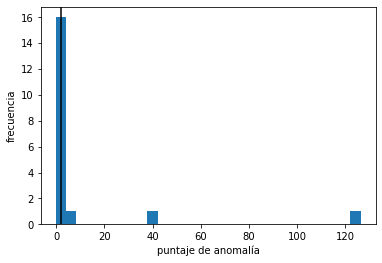

In [5]:
#Detección con el algoritmo ROD
from pyod.models.rod import ROD
import pandas as pd
 
X = pd.DataFrame(data={'edad':edades,'salario':salario_anual_miles, 'compras':compras_mes})
 
clf = ROD(contamination=0.22)
clf.fit(X)
y_pred = clf.predict(X)
print(X[y_pred == 1])

anomaly_score = clf.decision_function(X)
min_outlier_anomaly_score = np.floor(np.min(anomaly_score[np.where(y_pred == 1)])*10)/10
plt.hist(anomaly_score, bins=30)
plt.axvline(min_outlier_anomaly_score, c='k')
plt.xlabel('puntaje de anomalía')
plt.ylabel('frecuencia')
plt.show()


    edad  salario  compras
10    30       56        5
16    33        2        2


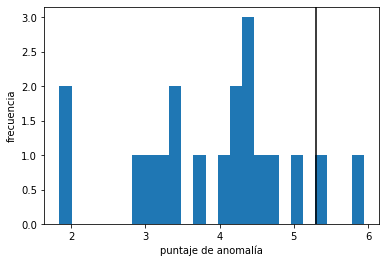

In [6]:
#Detección con el algoritmo ECOD
from pyod.models.ecod  import ECOD
clf = ECOD()
clf.fit(X)
y_pred_ECOD = clf.predict(X)
print(X[y_pred_ECOD == 1])
anomaly_score = clf.decision_function(X)
min_outlier_anomaly_score = np.floor(np.min(anomaly_score[np.where(y_pred_ECOD == 1)])*10)/10
plt.hist(anomaly_score, bins=25)
plt.axvline(min_outlier_anomaly_score, c='k')
plt.xlabel('puntaje de anomalía')
plt.ylabel('frecuencia')
plt.show()

In [ ]:
#Detección con el algoritmo DeepSVDD
from pyod.models.deep_svdd  import DeepSVDD
clf = DeepSVDD()

clf.fit(X)
y_pred_DEEPSVDD = clf.predict(X)
print(X[y_pred_DEEPSVDD == 1])
anomaly_score = clf.decision_function(X)
min_outlier_anomaly_score = np.floor(np.min(anomaly_score[np.where(y_pred_DEEPSVDD == 1)])*10)/10
plt.hist(anomaly_score, bins=25)
plt.axvline(min_outlier_anomaly_score, c='k')
plt.xlabel('puntaje de anomalía')
plt.ylabel('frecuencia')